In [1]:
#  Using airline-passenger Dataset try to predict the number of passengers for next month,given the
#  number of passengers (in units of thousands) for this month

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("AirPassengers.csv")

In [4]:
data.head()

Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

In [5]:
# A. You can write a simple function to convert our single column of data into a two-column
#    dataset:
#         a. The first column containing this month’s (t) passenger count and the second
#            column containing next month’s (t+1) passenger count, to be predicted.
#         b. Divide the data into train and test set
#         c. Fit an LSTM model on top of the data where the optimizer = ‘adam’ and epoch
#            =’100’
#         d. Build another model where optimizer = ‘sgd’ and epoch = ‘50’

In [6]:
data = data['#Passengers'].values

In [7]:
data

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432])

In [8]:
def create_data(data,timeperiod):
  x = []
  y = []
  for i in range(len(data)-timeperiod - 1):
    x.append(data[i:(i+timeperiod)-1])
    y.append(data[(i+timeperiod)-1])
  return x,y

In [9]:
x , y = create_data(data = data , timeperiod = 3)

In [51]:
x

array([[112, 118],
       [118, 132],
       [132, 129],
       [129, 121],
       [121, 135],
       [135, 148],
       [148, 148],
       [148, 136],
       [136, 119],
       [119, 104],
       [104, 118],
       [118, 115],
       [115, 126],
       [126, 141],
       [141, 135],
       [135, 125],
       [125, 149],
       [149, 170],
       [170, 170],
       [170, 158],
       [158, 133],
       [133, 114],
       [114, 140],
       [140, 145],
       [145, 150],
       [150, 178],
       [178, 163],
       [163, 172],
       [172, 178],
       [178, 199],
       [199, 199],
       [199, 184],
       [184, 162],
       [162, 146],
       [146, 166],
       [166, 171],
       [171, 180],
       [180, 193],
       [193, 181],
       [181, 183],
       [183, 218],
       [218, 230],
       [230, 242],
       [242, 209],
       [209, 191],
       [191, 172],
       [172, 194],
       [194, 196],
       [196, 196],
       [196, 236],
       [236, 235],
       [235, 229],
       [229,

In [11]:
y

[132,
 129,
 121,
 135,
 148,
 148,
 136,
 119,
 104,
 118,
 115,
 126,
 141,
 135,
 125,
 149,
 170,
 170,
 158,
 133,
 114,
 140,
 145,
 150,
 178,
 163,
 172,
 178,
 199,
 199,
 184,
 162,
 146,
 166,
 171,
 180,
 193,
 181,
 183,
 218,
 230,
 242,
 209,
 191,
 172,
 194,
 196,
 196,
 236,
 235,
 229,
 243,
 264,
 272,
 237,
 211,
 180,
 201,
 204,
 188,
 235,
 227,
 234,
 264,
 302,
 293,
 259,
 229,
 203,
 229,
 242,
 233,
 267,
 269,
 270,
 315,
 364,
 347,
 312,
 274,
 237,
 278,
 284,
 277,
 317,
 313,
 318,
 374,
 413,
 405,
 355,
 306,
 271,
 306,
 315,
 301,
 356,
 348,
 355,
 422,
 465,
 467,
 404,
 347,
 305,
 336,
 340,
 318,
 362,
 348,
 363,
 435,
 491,
 505,
 404,
 359,
 310,
 337,
 360,
 342,
 406,
 396,
 420,
 472,
 548,
 559,
 463,
 407,
 362,
 405,
 417,
 391,
 419,
 461,
 472,
 535,
 622,
 606,
 508,
 461]

In [50]:
x = np.array(x)
y = np.array(y)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size =0.70 ,random_state = 0)

In [15]:
x_train = x_train.reshape(98 ,1 , 2)
x_test = x_test.reshape(42 , 1 , 2)

In [24]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(98, 1, 2)
(98,)
(42, 1, 2)
(42,)


# Model-building

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,Adadelta,SGD
from tensorflow.keras.layers import Input,Dense,SimpleRNN,LSTM

In [18]:
# c. Fit an LSTM model on top of the data where the optimizer = ‘adam’ and epoch=’100’.

In [31]:
model = Sequential()
model.add(LSTM(50))
model.add(Dense(1))

In [33]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics = 'accuracy')

In [34]:
model.fit(x=x_train , y = y_train , epochs = 100,validation_data=(x_test , y_test))

Epoch 1/100
4/4 [==============================] - 3s 196ms/step - loss: 96882.5938 - accuracy: 0.0000e+00 - val_loss: 83752.3359 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 96714.2422 - accuracy: 0.0000e+00 - val_loss: 83596.1094 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 96571.2422 - accuracy: 0.0000e+00 - val_loss: 83467.1094 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 20ms/step - loss: 96450.9297 - accuracy: 0.0000e+00 - val_loss: 83361.6641 - val_accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 21ms/step - loss: 96355.9688 - accuracy: 0.0000e+00 - val_loss: 83286.9141 - val_accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 21ms/step - loss: 96271.8047 - accuracy: 0.0000e+00 - val_loss: 83197.4141 - val_accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 21ms/step

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                10600     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10651 (41.61 KB)
Trainable params: 10651 (41.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
finalX, finalY = create_data(data, timeperiod=3)


In [37]:
preds = model.predict(np.array(finalX).reshape(-1,1,2))

5/5 [==============================] - 1s 3ms/step


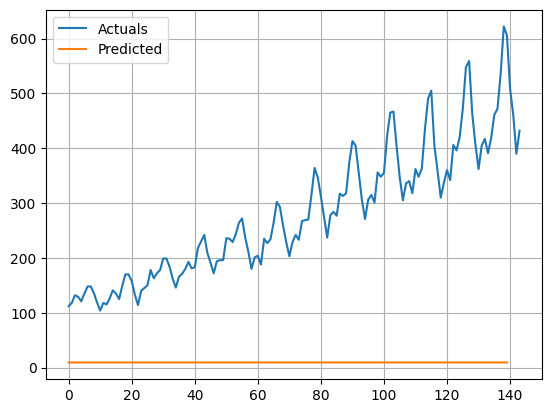

In [38]:
plt.plot(data)
plt.plot(preds)
plt.legend(["Actuals", "Predicted"])
plt.grid()
plt.show()

In [39]:
#         d. Build another model where optimizer = ‘sgd’ and epoch = ‘50’

In [53]:
model_sgd = Sequential([
    LSTM(50, input_shape=(1, 1)),  # Adjust input_shape to match the shape of X
    Dense(1)
])
